Checkpoint 1
-

### Introduction and Motivation

Goal: To develop a reliable Method for predicitng milk quality based on key factors such as ph, temperature, and odor. 





### Data Description

The chosen dataset was aquired from kaggle.com and procured by []. It consists of 7 independent variables: ph, temperature, taste, odor, fat, turbidity, and color and one target variable indicating the quality of the milk. 

### Exploratory Data Analysis:

In [133]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [134]:
df = pd.read_csv('milknew.csv')
unencoded_df = df
df = pd.get_dummies(df, columns=['Taste', 'Odor', 'Fat', 'Turbidity'], drop_first=True)
df['Grade'] = df['Grade'].map({'low': 0, 'medium': 1, 'high': 2})

print(df.head())
print(df.info())
print(df.describe(include='all'))
print(df.columns)

    pH  Temperature  Color  Grade  Taste_1  Odor_1  Fat_1  Turbidity_1
0  6.6           35    254      2     True   False   True        False
1  6.6           36    253      2    False    True  False         True
2  8.5           70    246      0     True    True   True         True
3  9.5           34    255      0     True    True  False         True
4  6.6           37    255      1    False   False  False        False
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1059 entries, 0 to 1058
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   pH           1059 non-null   float64
 1   Temperature  1059 non-null   int64  
 2   Color        1059 non-null   int64  
 3   Grade        1059 non-null   int64  
 4   Taste_1      1059 non-null   bool   
 5   Odor_1       1059 non-null   bool   
 6   Fat_1        1059 non-null   bool   
 7   Turbidity_1  1059 non-null   bool   
dtypes: bool(4), float64(1), int64(3)
memory usa

In [135]:
df.isnull().sum()

pH             0
Temperature    0
Color          0
Grade          0
Taste_1        0
Odor_1         0
Fat_1          0
Turbidity_1    0
dtype: int64

### Plotting Continuous Features

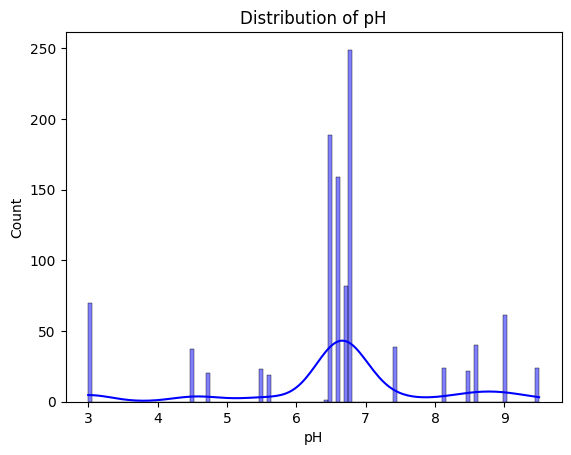

In [136]:
sns.histplot(df['pH'], kde=True, color='blue')
plt.title('Distribution of pH')

plt.show()

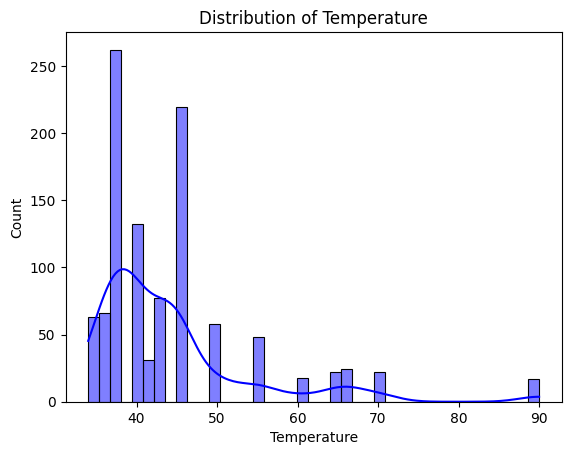

In [137]:
sns.histplot(df['Temperature'], kde=True, color='blue')
plt.title('Distribution of Temperature')

plt.show()

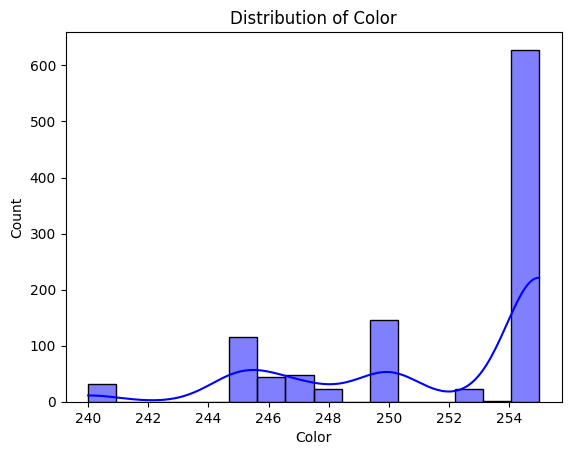

In [138]:
sns.histplot(df['Color'], kde=True, color='blue')
plt.title('Distribution of Color')

plt.show()

### Plotting Categorical Features

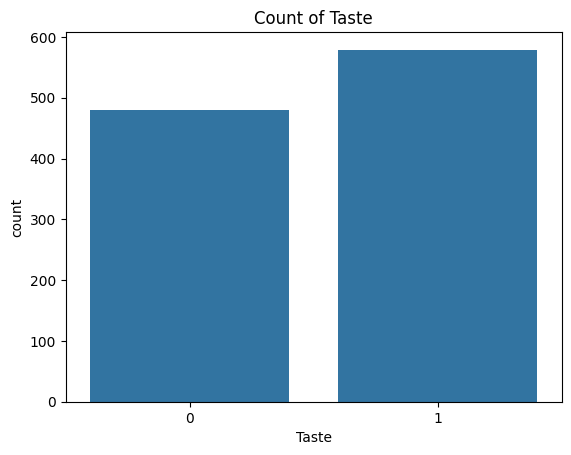

In [139]:
sns.countplot(x='Taste', data=unencoded_df)
plt.title('Count of Taste')

plt.show()

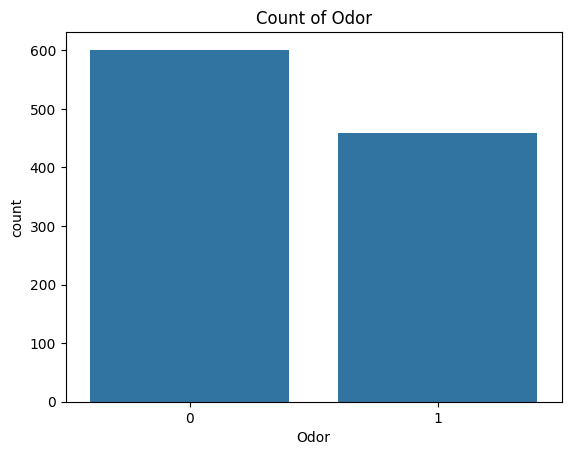

In [140]:
sns.countplot(x='Odor', data=unencoded_df)
plt.title('Count of Odor')

plt.show()

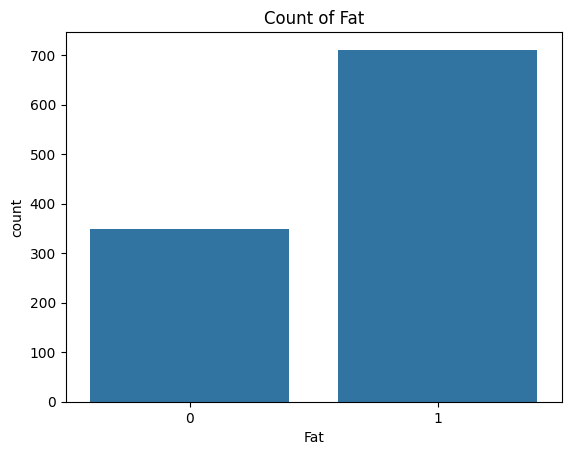

In [141]:
sns.countplot(x='Fat', data=unencoded_df)
plt.title('Count of Fat')

plt.show()

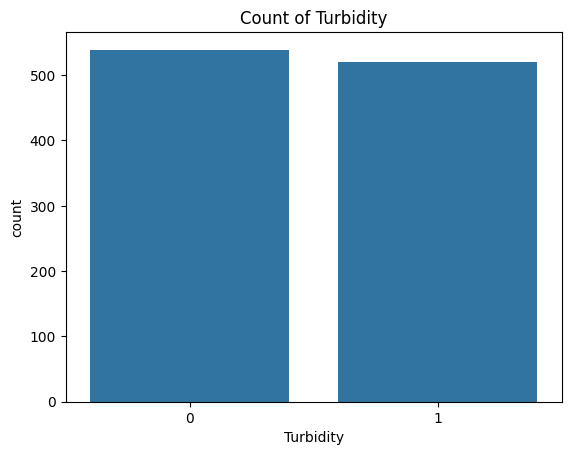

In [142]:
sns.countplot(x='Turbidity', data=unencoded_df)
plt.title('Count of Turbidity')

plt.show()

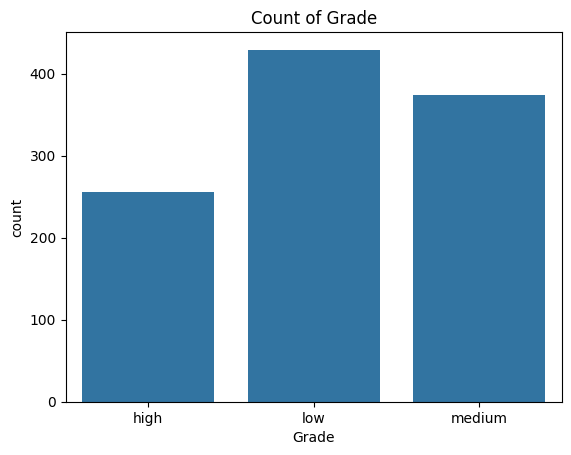

In [143]:
sns.countplot(x='Grade', data=unencoded_df)
plt.title('Count of Grade')

plt.show()

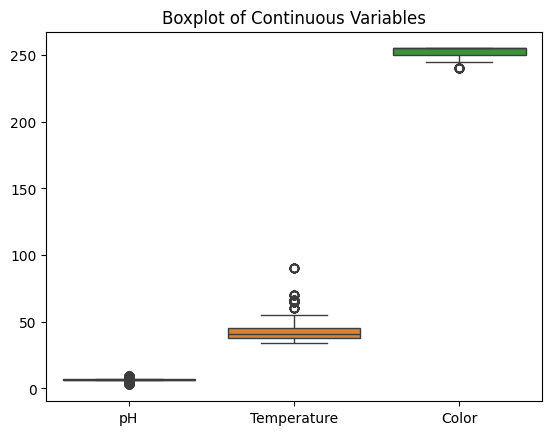

In [149]:
sns.boxplot(data=df[['pH', 'Temperature', 'Color']])
plt.title('Boxplot of Continuous Variables')
plt.show()

### Analyzing correlation

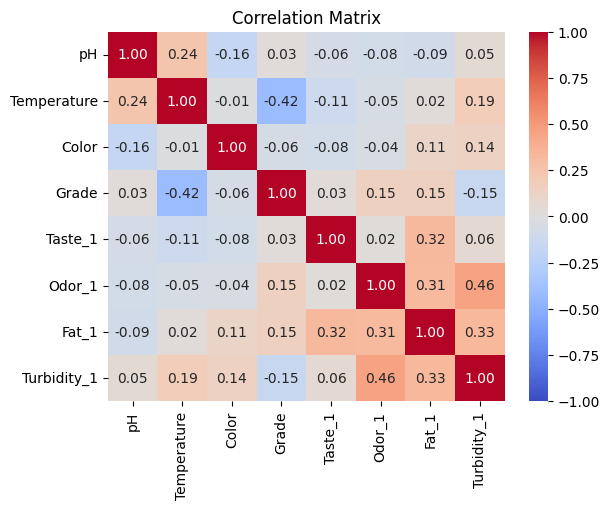

In [144]:
corr_matrix = df.corr()

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

## Model testing

In [145]:
df.columns

Index(['pH', 'Temperature', 'Color', 'Grade', 'Taste_1', 'Odor_1', 'Fat_1',
       'Turbidity_1'],
      dtype='object')

In [146]:
from sklearn.model_selection import train_test_split

X = df[['pH', 'Temperature', 'Color', 'Taste_1', 'Odor_1', 'Fat_1', 'Turbidity_1']]
y = df[['Grade']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [152]:
from sklearn.linear_model import LogisticRegression

full_model = LogisticRegression(multi_class='multinomial', max_iter=100)
full_model.fit(X_train, y_train)

/opt/anaconda3/envs/testenv/lib/python3.12/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/testenv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/testenv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https

LogisticRegression(multi_class='multinomial')